In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
#Performance Metrics Librares

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Dataset Import

In [ ]:
PATH_TRAINCSV = r'/content/drive/MyDrive/Dataset/train.csv'


In [ ]:
df=pd.read_csv(PATH_TRAINCSV)


In [ ]:
df.shape

(4500, 514)

In [ ]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


# Preprocessing of Dataset

In [ ]:
# checking the missing values
df.isna().sum()

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64

In [ ]:
#Checking duplicate rows
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses


In [ ]:
#information of data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 514 entries, id to glasses
dtypes: float64(512), int64(2)
memory usage: 17.6 MB


In [ ]:
#statistical information of the dataset
df.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,...,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,1299.182435,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,...,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,1.000000,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,...,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,1125.750000,-0.489807,-0.568788,-0.575425,-0.548002,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,...,-0.537458,-0.445472,-0.546610,-0.601095,-0.506628,-0.605840,-0.546325,-0.373465,-0.615955,0.000000
50%,2250.500000,-0.001540,-0.097665,-0.053115,-0.058240,0.003175,-0.046450,0.005075,-0.097295,-0.149740,...,-0.124335,0.034310,-0.045235,-0.103520,-0.038690,-0.099355,-0.032260,0.113235,-0.082685,1.000000
75%,3375.250000,0.507332,0.405330,0.458387,0.478183,0.555465,0.498605,0.506625,0.379340,0.377330,...,0.370608,0.571075,0.438713,0.429145,0.459985,0.417493,0.495538,0.585468,0.469020,1.000000
max,4500.000000,2.518200,2.452530,3.637160,2.775740,3.247220,3.028140,2.761340,2.548660,2.384070,...,2.954360,2.375880,2.641460,3.227290,2.654210,2.833950,2.632360,2.405620,2.827810,1.000000


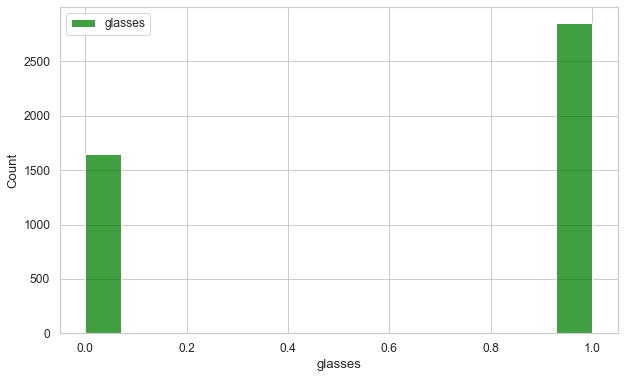

In [ ]:
# checking the distribution of target class
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 6]})
sns.histplot(data = df, x="glasses", color="green", label="glasses")
plt.legend() 
plt.show()

In [ ]:
# separation of dependenta and independent column
X=df.drop(['id', 'glasses'], axis=1)
y=df['glasses']
X.values
y.values

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Scaling the Dataset(normalization process)

In [ ]:
# Scaling the dataset
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Artificial Neural Network Model 1

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(512,)),
    keras.layers.Dense(32, activation=tf.nn.relu),
	keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=32)


Epoch 1/10
99/99 [==============================] - 1s 3ms/step - loss: 0.6474 - accuracy: 0.6317 - val_loss: 0.5954 - val_accuracy: 0.6896
Epoch 2/10
99/99 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7498 - val_loss: 0.5109 - val_accuracy: 0.7741
Epoch 3/10
99/99 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8352 - val_loss: 0.4090 - val_accuracy: 0.8452
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.9079 - val_loss: 0.3082 - val_accuracy: 0.9000
Epoch 5/10
99/99 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9460 - val_loss: 0.2270 - val_accuracy: 0.9319
Epoch 6/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9673 - val_loss: 0.1701 - val_accuracy: 0.9526
Epoch 7/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9816 - val_loss: 0.1317 - val_accuracy: 0.9652
Epoch 8/10
99/99 [==

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

43/43 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9807
Test accuracy: 0.9807407259941101


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


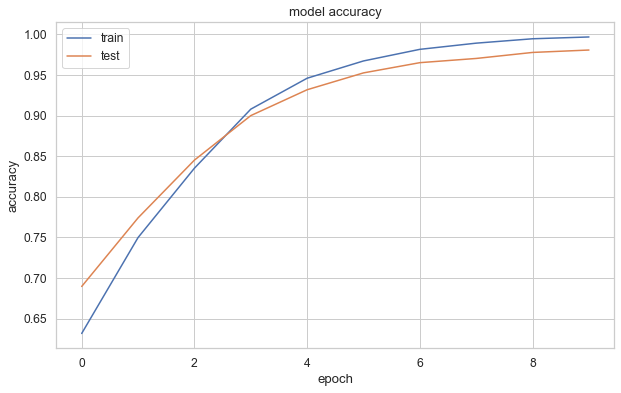

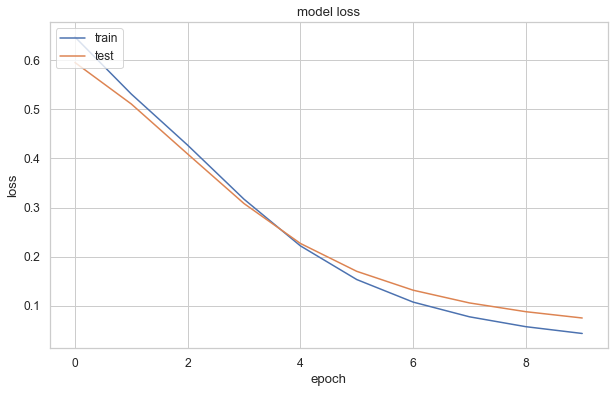

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Performance Evaluation

In [ ]:
#Model prediction
pred = model.predict(X_test)
y_pred = (pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
#Model Accuracy
print('Model accuracy', accuracy_score(y_test, y_pred))

Model accuracy 0.9807407407407407


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[465  17]
 [  9 859]]


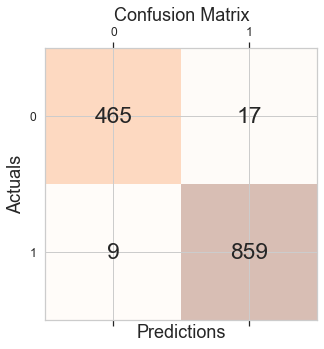

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.981


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.990


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.985


In [ ]:
y_prob = model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9983435952349083

Text(0.5, 0, 'False Positive Rate')

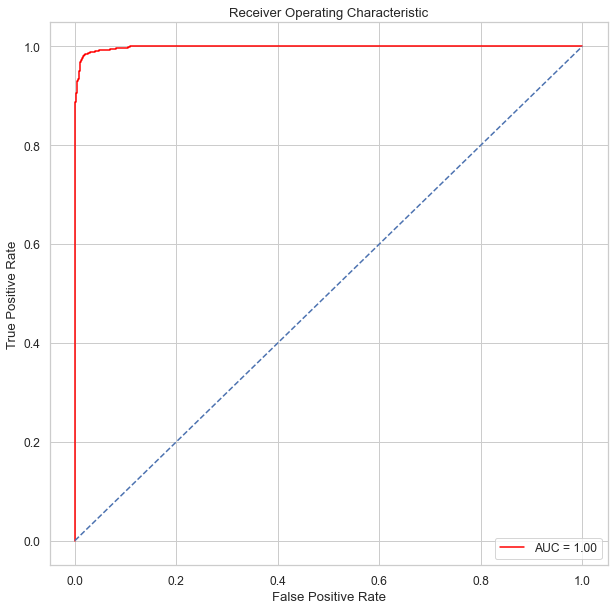

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Neural Network Model 2

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(512,)),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_2=model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=32)

Epoch 1/10
99/99 [==============================] - 4s 38ms/step - loss: 0.1997 - accuracy: 0.9032 - val_loss: 0.0113 - val_accuracy: 0.9948
Epoch 2/10
99/99 [==============================] - 4s 38ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0152 - val_accuracy: 0.9933
Epoch 3/10
99/99 [==============================] - 4s 40ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0253 - val_accuracy: 0.9933
Epoch 4/10
99/99 [==============================] - 4s 40ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0124 - val_accuracy: 0.9963
Epoch 5/10
99/99 [==============================] - 4s 39ms/step - loss: 0.0033 - accuracy: 0.9984 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 6/10
99/99 [==============================] - 4s 39ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0951 - val_accuracy: 0.9867
Epoch 7/10
99/99 [==============================] - 4s 42ms/step - loss: 0.0065 - accuracy: 0.9968 - val_loss: 0.0425 - val_accuracy: 0.9896
Epoch 8/10
99

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

43/43 [==============================] - 1s 12ms/step - loss: 0.0689 - accuracy: 0.9919
Test accuracy: 0.9918518662452698


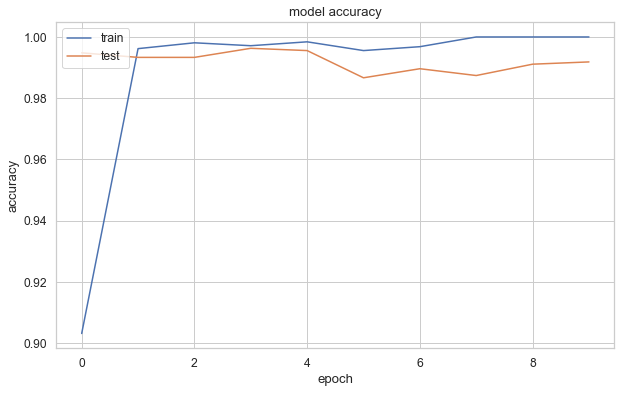

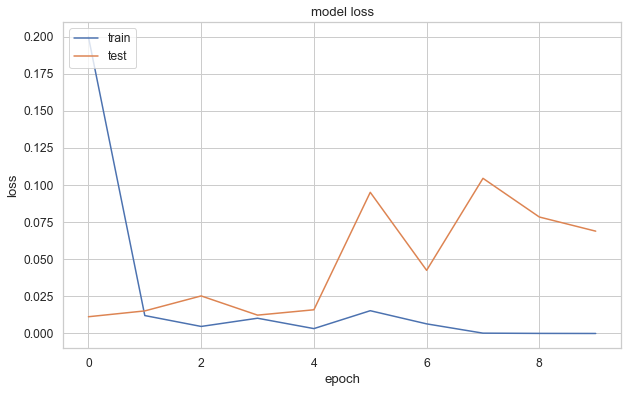

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Performance Evaluation

In [ ]:
#Model prediction
pred = model_2.predict(X_test)
y_pred = (pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
#Model Accuracy
print('Model accuracy', accuracy_score(y_test, y_pred))

Model accuracy 0.9918518518518519


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[471  11]
 [  0 868]]


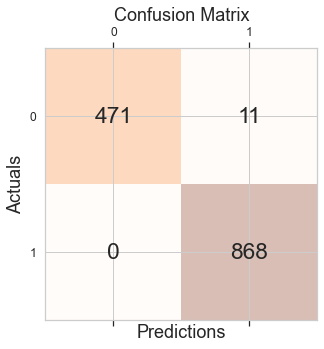

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.987


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 1.000


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.994


# Neural Network Model 3

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(512,)),
    keras.layers.Dense(1000, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01), input_shape=(512,)),
    Dropout(0.3),
    keras.layers.Dense(1000, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    keras.layers.Dense(1000, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    keras.layers.Dense(1000, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_3=model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=32)

Epoch 1/10
99/99 [==============================] - 6s 51ms/step - loss: 12.0469 - accuracy: 0.9203 - val_loss: 2.1412 - val_accuracy: 0.9896
Epoch 2/10
99/99 [==============================] - 6s 63ms/step - loss: 0.9490 - accuracy: 0.9990 - val_loss: 0.3970 - val_accuracy: 0.9970
Epoch 3/10
99/99 [==============================] - 6s 61ms/step - loss: 0.2604 - accuracy: 1.0000 - val_loss: 0.2034 - val_accuracy: 0.9956
Epoch 4/10
99/99 [==============================] - 6s 56ms/step - loss: 0.2708 - accuracy: 0.9876 - val_loss: 0.3804 - val_accuracy: 0.9844
Epoch 5/10
99/99 [==============================] - 7s 73ms/step - loss: 0.2980 - accuracy: 0.9949 - val_loss: 0.2121 - val_accuracy: 0.9963
Epoch 6/10
99/99 [==============================] - 7s 66ms/step - loss: 0.1763 - accuracy: 0.9987 - val_loss: 0.1740 - val_accuracy: 0.9933
Epoch 7/10
99/99 [==============================] - 6s 60ms/step - loss: 0.1643 - accuracy: 0.9978 - val_loss: 0.2009 - val_accuracy: 0.9881
Epoch 8/10
9

In [ ]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

43/43 [==============================] - 1s 14ms/step - loss: 0.1605 - accuracy: 1.0000
Test accuracy: 1.0


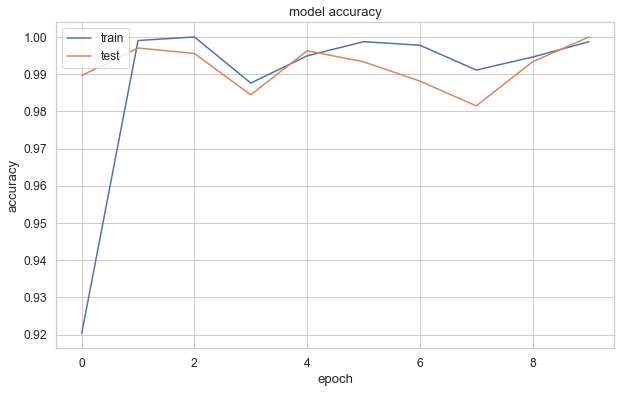

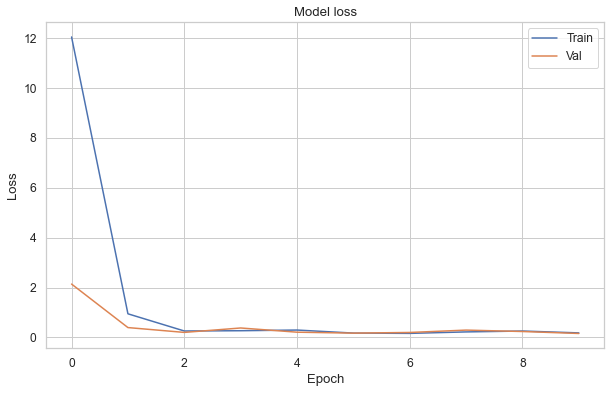

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim(top=1.2, bottom=0)
plt.show()


# Performance Evaluation

In [ ]:
#Model prediction
pred = model_3.predict(X_test)
y_pred = (pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
#Model Accuracy
print('Model accuracy', accuracy_score(y_test, y_pred))

Model accuracy 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[482   0]
 [  0 868]]


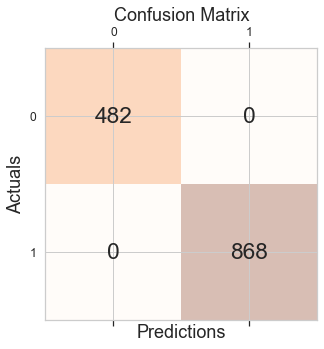

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 1.000


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 1.000


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 1.000
